In [1]:
from includes.helpers import get_crypto_data, plot_crypto
from includes.technical_indicators import calculate_rsi, calculate_macd, calculate_williams_r, calculate_bollinger_b, calculate_natr, calculate_volume_roc, calculate_vol_ratio


Fetching BTC-USD data from 2020-01-01 to 2025-12-14...


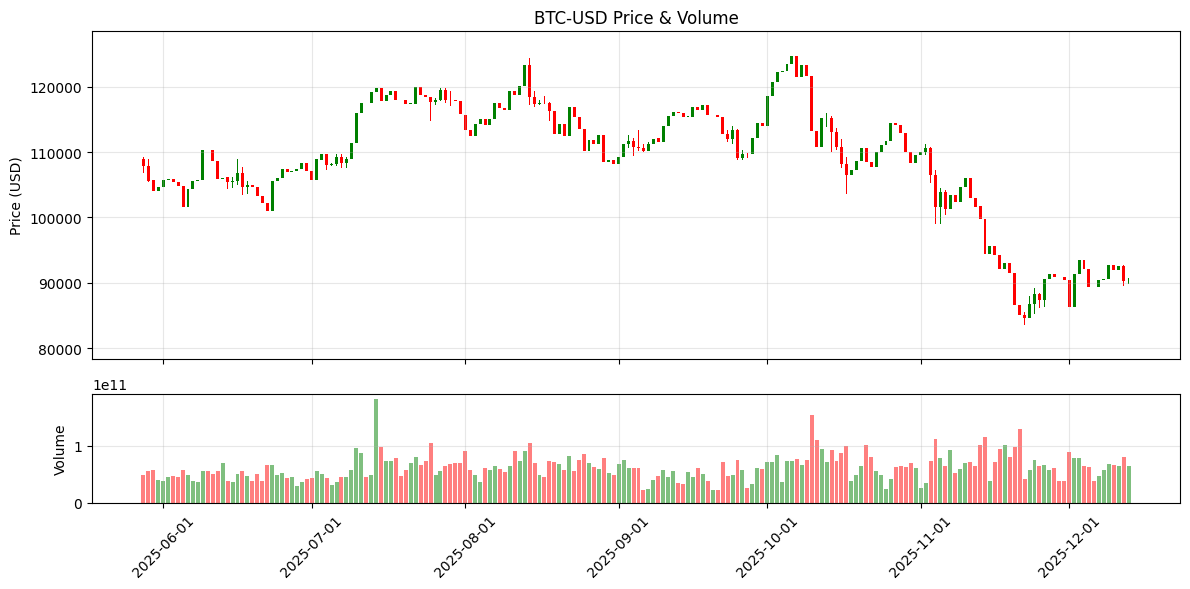

In [2]:
start = "2020-01-01"
end = "2025-12-14" 

btc_data = get_crypto_data("BTC-USD", start_date=start, end_date=end)  # insted of "BTC-USD" you can use any other crypto like "ETH-USD"
subset = btc_data.tail(200)
plot_crypto(subset)

In [3]:
btc_data['RSI'] = calculate_rsi(btc_data)

# 2. MACD (Returns two columns)
btc_data['MACD_Line'], btc_data['Signal_Line'] = calculate_macd(btc_data)

# 3. Williams %R
btc_data['Williams_R'] = calculate_williams_r(btc_data)

# 4. Bollinger %B
btc_data['Bollinger_B'] = calculate_bollinger_b(btc_data)

# 5. Normalized ATR
btc_data['NATR'] = calculate_natr(btc_data)

# 6. Volume ROC
btc_data['Vol_ROC'] = calculate_volume_roc(btc_data)

# 7. Volatility Ratio
btc_data['Vol_Ratio'] = calculate_vol_ratio(btc_data, period=14)


In [4]:
btc_data.head()

Price,Open,High,Low,Close,Volume,RSI,MACD_Line,Signal_Line,Williams_R,Bollinger_B,NATR,Vol_ROC,Vol_Ratio
Date,,,,,,,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,18565664997,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,20802083465,0.000000,-17.127393,-3.425479,NaN,NaN,NaN,12.045992,NaN
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,28111481032,65.888181,-1.679899,-3.076363,NaN,NaN,NaN,35.137815,NaN
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,18444271275,70.054361,15.688789,0.676668,NaN,NaN,NaN,-34.388831,NaN
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,19725074095,70.096688,29.170646,6.375463,NaN,NaN,NaN,6.944177,NaN


In [5]:
# Clean up (drop the first few rows that will be NaN due to lookback periods)
btc_data.dropna(inplace=True)
btc_data.head()

Price,Open,High,Low,Close,Volume,RSI,MACD_Line,Signal_Line,Williams_R,Bollinger_B,NATR,Vol_ROC,Vol_Ratio
Date,,,,,,,,,,,,,
2020-01-20,8704.631836,8745.590820,8560.473633,8657.642578,26422375678,61.550465,394.589435,345.774630,-35.247925,0.718149,3.653566,-22.780699,0.561467
2020-01-21,8658.991211,8755.706055,8544.520508,8745.894531,24097418512,64.711780,385.021897,353.624084,-29.109032,0.731916,3.454335,-8.799198,0.667648
2020-01-22,8744.210938,8792.994141,8636.747070,8680.875977,22600204051,60.484312,367.951583,356.489583,-33.631787,0.689354,3.246758,-6.213174,0.517182
2020-01-23,8680.650391,8687.747070,8333.637695,8406.515625,25770680779,45.888384,328.497929,350.891252,-52.716564,0.537709,3.449769,14.028531,1.256389
2020-01-24,8405.567383,8514.666992,8266.840820,8445.434570,24397913026,47.944480,296.948025,340.102607,-62.228489,0.534787,3.271524,-5.326859,0.854557


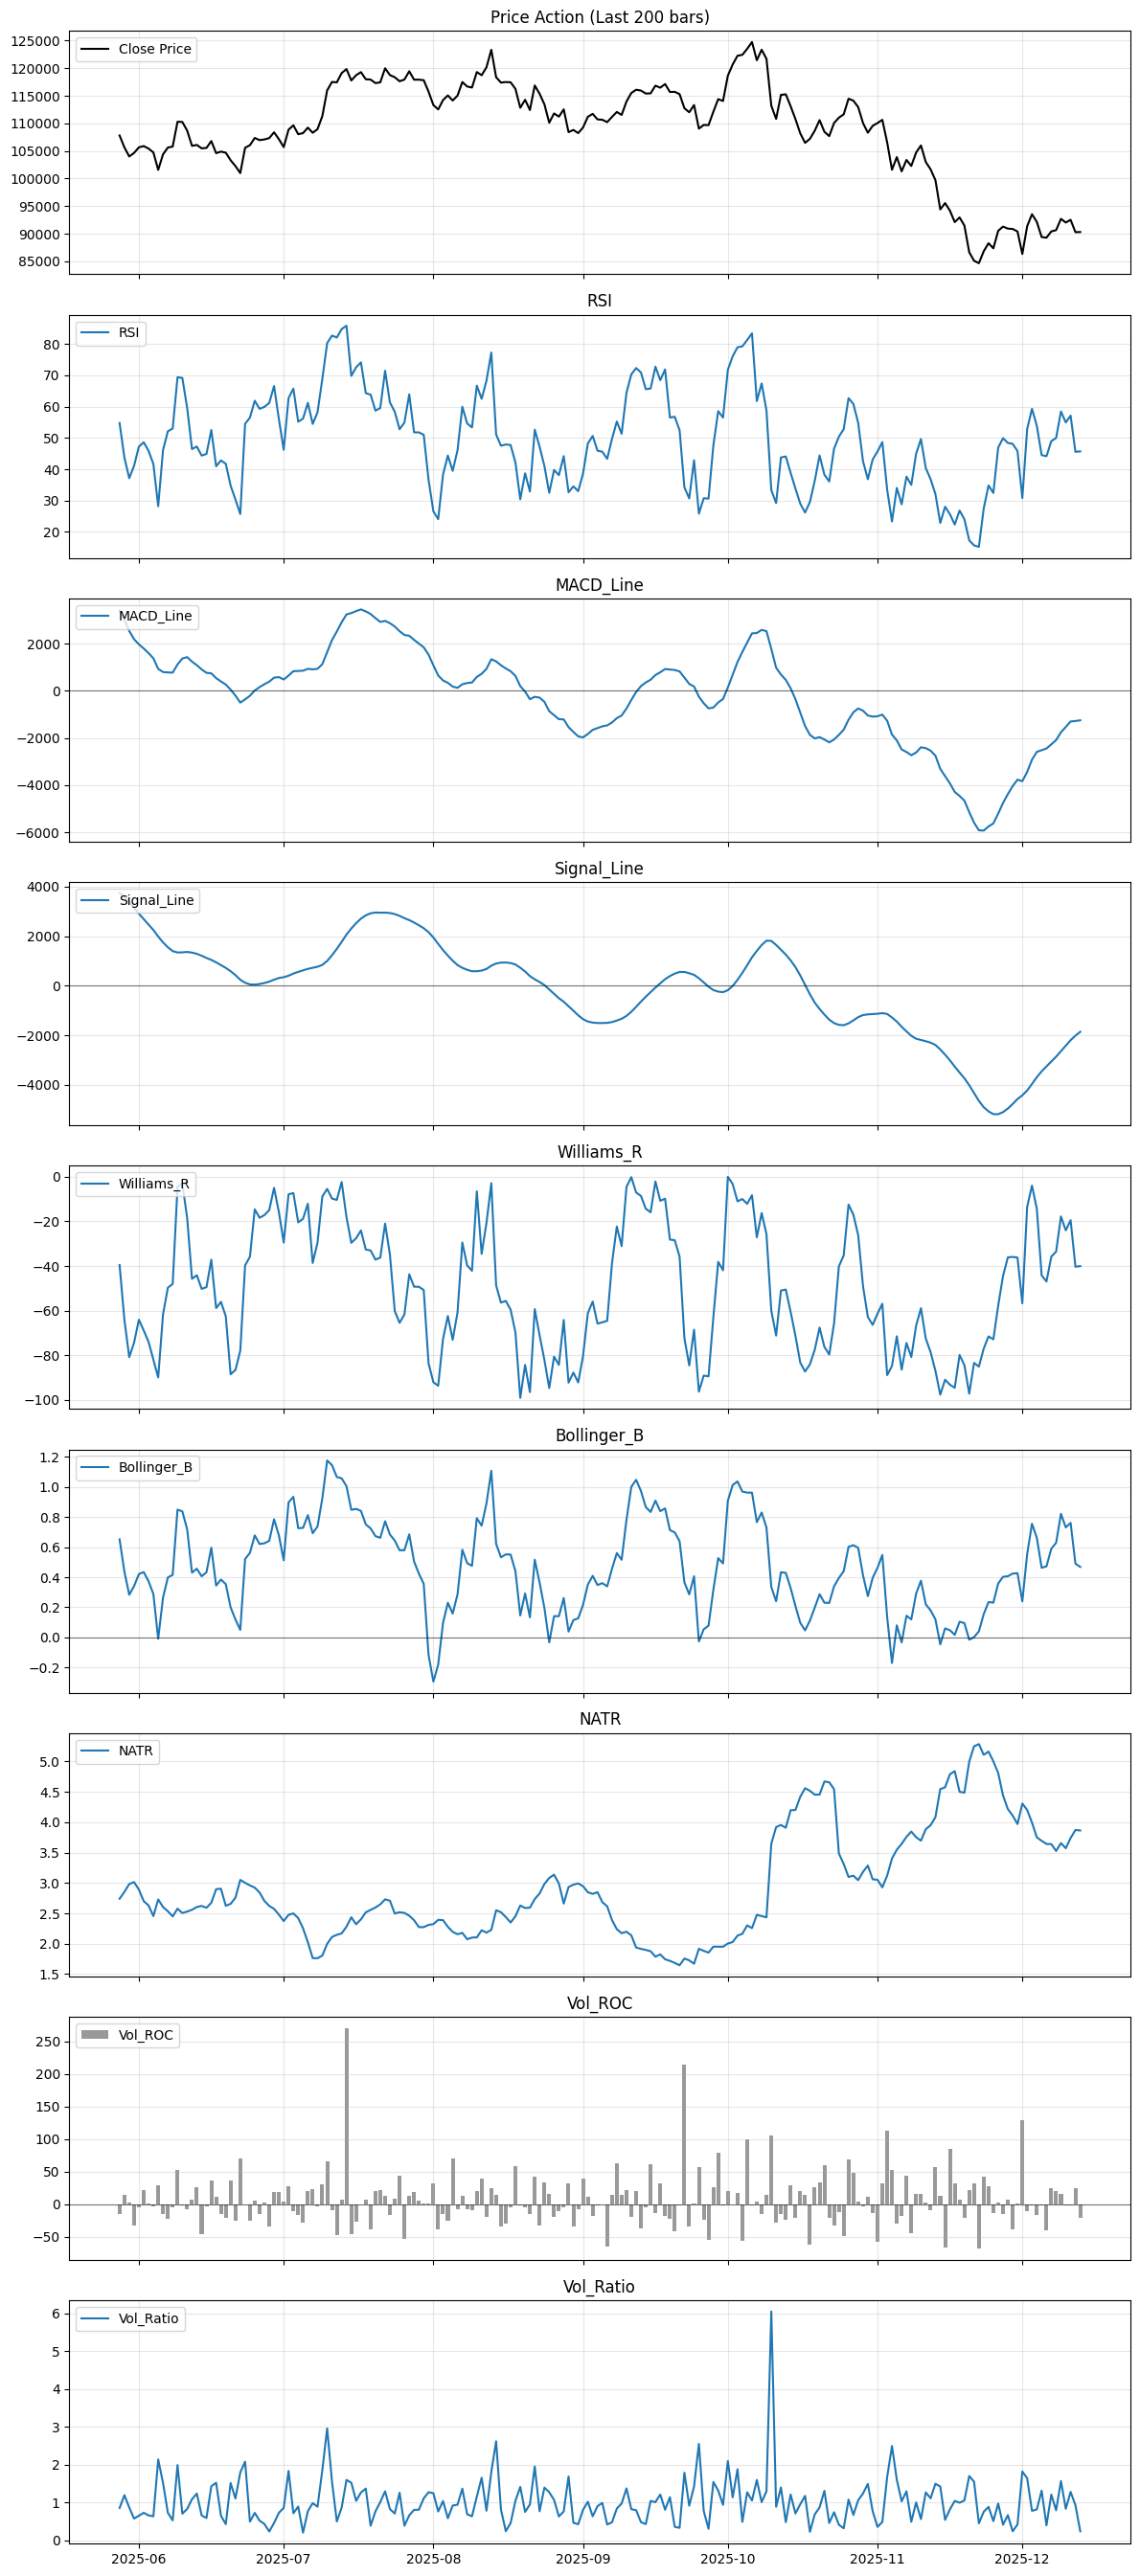

In [6]:
from includes.helpers import check_indicators
check_indicators(btc_data.tail(200))

In [7]:
from includes.data_process import create_dataset
N_DAYS = 10  # The "N" previous days

# Generate X and Y
X_train, y_train, X_test, y_test, scaler = create_dataset(btc_data, window_size=N_DAYS, scale=True, split_ratio=0.8)

print(f"--- Data Shapes for N={N_DAYS} ---")
print(f"X_train: {X_train.shape}  (Samples, TimeSteps, Features)")
print(f"y_train: {y_train.shape}  (Labels)")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")



print("\n--- Example Sample ---")
print(f"First training sample (Matrix 14x{X_train.shape[2]}):")
# print(X_train[0]) # Uncomment to see the raw numbers
print(f"Target Label: {y_train[0]} (1=Up, 0=Down)")


--- 🔍 Feature Selection ---
Total Features Detected: 13
X Features Used: ['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MACD_Line', 'Signal_Line', 'Williams_R', 'Bollinger_B', 'NATR', 'Vol_ROC', 'Vol_Ratio']
--- Data Shapes for N=10 ---
X_train: (1714, 10, 13)  (Samples, TimeSteps, Features)
y_train: (1714,)  (Labels)
X_test:  (421, 10, 13)
y_test:  (421,)

--- Example Sample ---
First training sample (Matrix 14x13):
Target Label: 1 (1=Up, 0=Down)


# LSTM Model for BTC prediction

2025-12-15 17:28:04.116671: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.



--- Class Weights: Disabled (1.0 for all) ---

--- Starting Training ---
Epoch 1/50


2025-12-15 17:28:05.675953: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4901 - loss: 0.6979 - val_accuracy: 0.4964 - val_loss: 0.6964
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4924 - loss: 0.6945 - val_accuracy: 0.4964 - val_loss: 0.6968
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5105 - loss: 0.6951 - val_accuracy: 0.4964 - val_loss: 0.7010
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5029 - loss: 0.6938 - val_accuracy: 0.4964 - val_loss: 0.6965
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5047 - loss: 0.6928 - val_accuracy: 0.4964 - val_loss: 0.6959
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5000 - loss: 0.6955 - val_accuracy: 0.4964 - val_loss: 0.6954
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5035 - loss: 0.6944 - val_accuracy: 0.4846 - val_loss: 0.6930
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4977 - loss: 0.6945 - val_accuracy: 0.4964 - val_loss: 0.6956
Epo

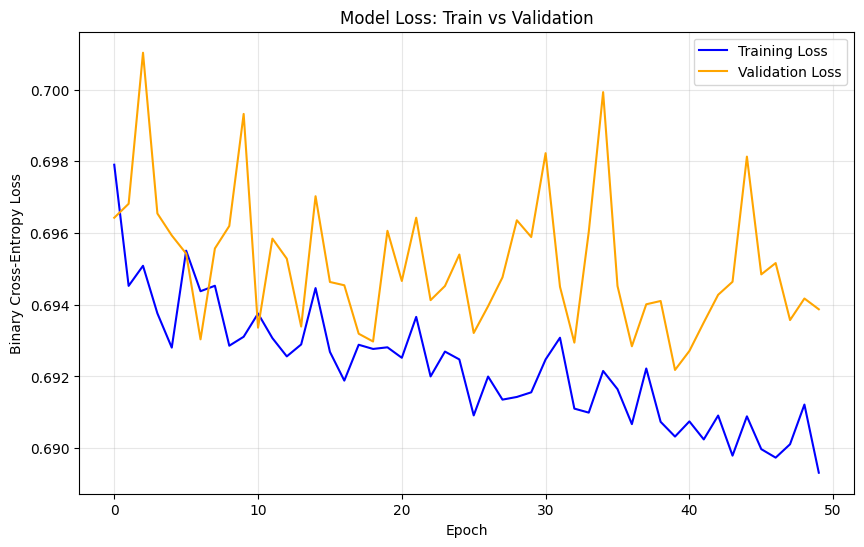

<Figure size 800x600 with 0 Axes>

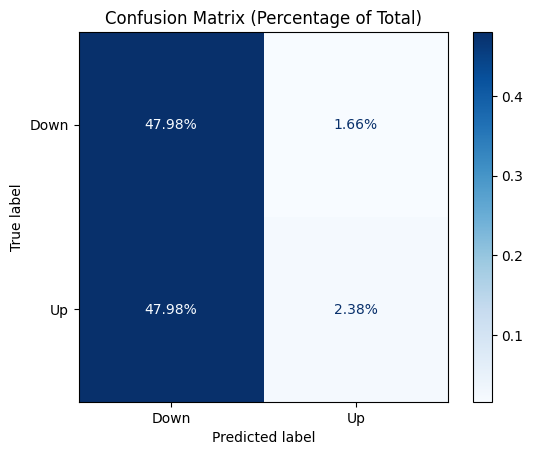


--- Detailed Report (Total Days: 421) ---
True Positives  (Up    -> Up)   : 10 (2.38%)
True Negatives  (Down  -> Down) : 202 (47.98%)
False Positives (Down  -> Up)   : 7 (1.66%)  <-- Trap
False Negatives (Up    -> Down) : 202 (47.98%)  <-- Missed Opp
--- Prediction Statistics ---
Max Prob: 0.5241
Min Prob: 0.4293
Mean Prob: 0.4685


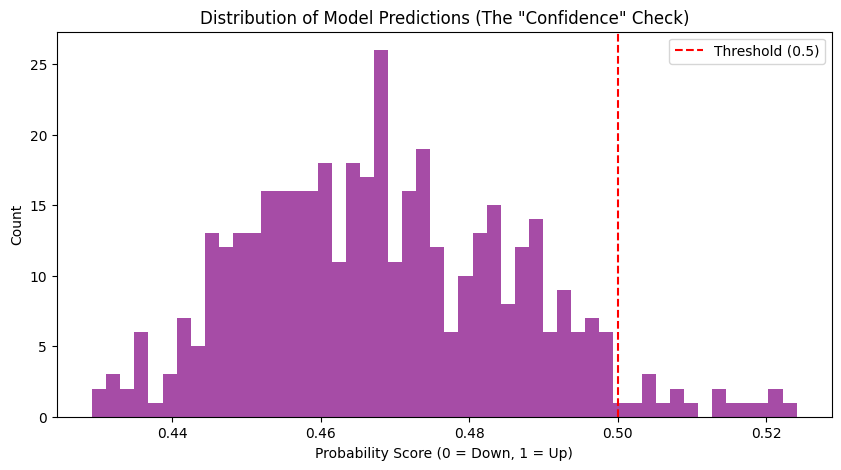

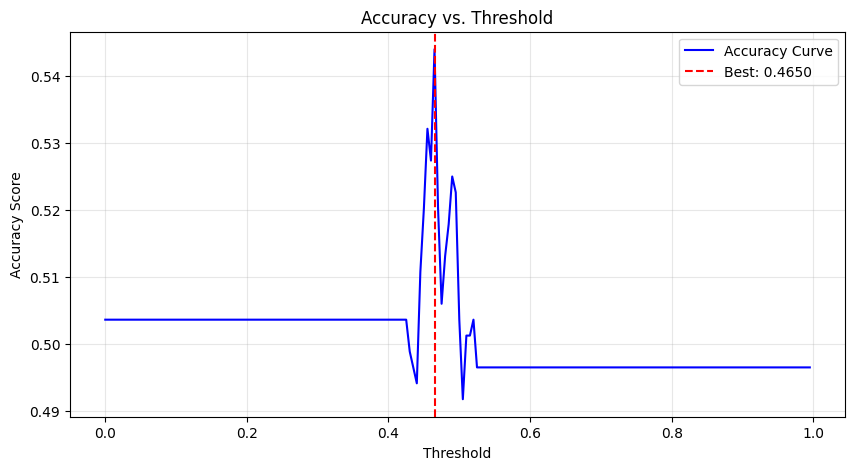

--- Optimization Results ---
Best Threshold: 0.4650
Max Accuracy:   54.39%
Saving artifacts to 'saved_artifacts/' with prefix 'btc_lstm'...
   -> Model saved to saved_artifacts/btc_lstm_model.keras (or .json)
   -> Scaler saved to saved_artifacts/btc_lstm_scaler.pkl
   -> Config saved to saved_artifacts/btc_lstm_config.json
✅ All artifacts saved successfully!


In [8]:
from includes.ml_models import build_lstm_model
from includes.ml_models import train_model
from includes.helpers import plot_training_loss
from includes.helpers import plot_confusion_matrix_percent
from includes.helpers import diagnose_model_output
from includes.ml_models import find_optimal_threshold
from includes.helpers import save_artifacts

# --- Execution Example ---
if __name__ == "__main__":
    # 1. Prepare Input Shape (assuming X_train exists from previous steps)
    # Shape: (Samples, TimeSteps, Features)
    input_shape = (X_train.shape[1], X_train.shape[2])
    
    # 2. Build the Model (using your previous build_lstm_model function)
    # You can swap this for any model function (GRU, CNN, etc.)
    my_model = build_lstm_model(input_shape)
    
    # 3. Train using the flexible function
    # Try changing use_class_weights to False to see the difference
    lstm_history, lstm_model = train_model(
        my_model, 
        X_train, y_train, 
        X_test, y_test, 
        epochs=50, 
        batch_size=32, 
        use_class_weights=False
    )

plot_training_loss(lstm_history)

plot_confusion_matrix_percent(lstm_model, X_test, y_test )

diagnose_model_output(lstm_model, X_test)

lstm_optimal_thresh = find_optimal_threshold(lstm_model, X_test, y_test)

save_artifacts(lstm_model, scaler, lstm_optimal_thresh, "btc_lstm")

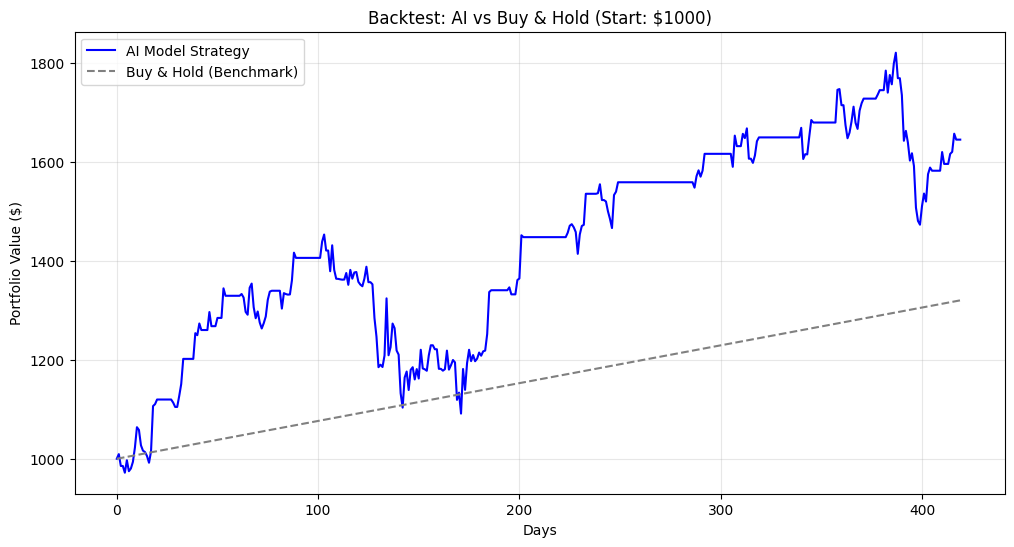

--- Final Results ---
Initial Investment: $1000
Buy & Hold Final:   $1320.88
AI Model Final:     $1644.95


In [9]:
from includes.helpers import backtest_strategy

test_slice_start = len(btc_data) - len(X_test)
df_test_slice = btc_data.iloc[test_slice_start:]
backtest_strategy(lstm_model, X_test, df_test_slice, threshold=lstm_optimal_thresh)

# XGBoost for BTC prediction


--- Class Weights: Disabled (1.0 for all) ---

--- Starting Training ---
[0]	validation_0-logloss:0.68416	validation_1-logloss:0.69376
[1]	validation_0-logloss:0.67713	validation_1-logloss:0.69370
[2]	validation_0-logloss:0.67254	validation_1-logloss:0.69333
[3]	validation_0-logloss:0.66559	validation_1-logloss:0.69283
[4]	validation_0-logloss:0.66103	validation_1-logloss:0.69184
[5]	validation_0-logloss:0.65185	validation_1-logloss:0.69126
[6]	validation_0-logloss:0.64694	validation_1-logloss:0.69135
[7]	validation_0-logloss:0.64106	validation_1-logloss:0.69148
[8]	validation_0-logloss:0.63393	validation_1-logloss:0.69003
[9]	validation_0-logloss:0.62854	validation_1-logloss:0.68988
[10]	validation_0-logloss:0.62344	validation_1-logloss:0.68946
[11]	validation_0-logloss:0.62127	validation_1-logloss:0.68906
[12]	validation_0-logloss:0.61613	validation_1-logloss:0.68877
[13]	validation_0-logloss:0.61130	validation_1-logloss:0.68971
[14]	validation_0-logloss:0.60691	validation_1-logloss

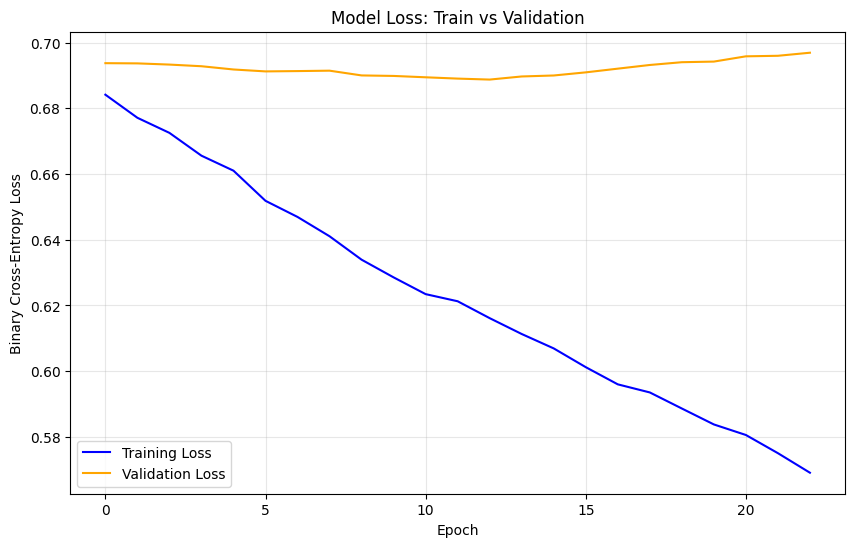

<Figure size 800x600 with 0 Axes>

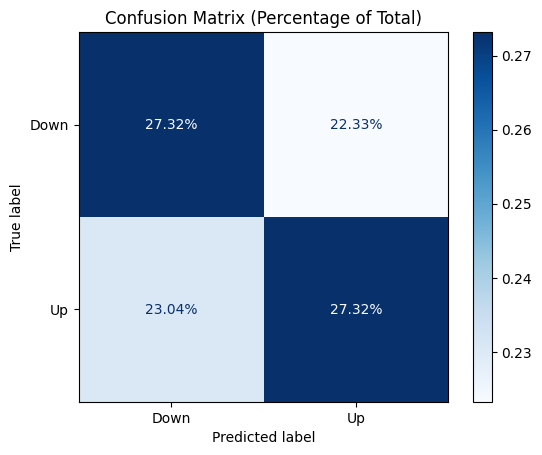


--- Detailed Report (Total Days: 421) ---
True Positives  (Up    -> Up)   : 115 (27.32%)
True Negatives  (Down  -> Down) : 115 (27.32%)
False Positives (Down  -> Up)   : 94 (22.33%)  <-- Trap
False Negatives (Up    -> Down) : 97 (23.04%)  <-- Missed Opp
--- Prediction Statistics ---
Max Prob: 0.6336
Min Prob: 0.3800
Mean Prob: 0.4985


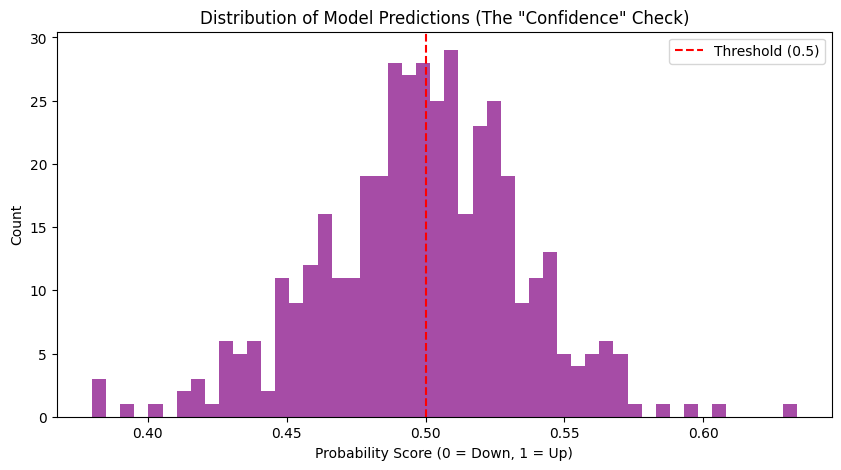

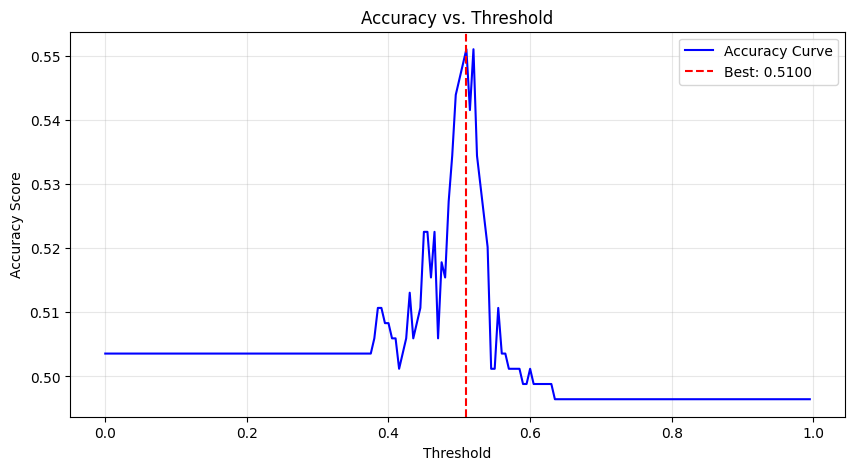

--- Optimization Results ---
Best Threshold: 0.5100
Max Accuracy:   55.11%
Saving artifacts to 'saved_artifacts/' with prefix 'btc_xgboost'...
XGBoost model saved to saved_artifacts/btc_xgboost_model.json
   -> Model saved to saved_artifacts/btc_xgboost_model.keras (or .json)
   -> Scaler saved to saved_artifacts/btc_xgboost_scaler.pkl
   -> Config saved to saved_artifacts/btc_xgboost_config.json
✅ All artifacts saved successfully!


In [10]:
from includes.ml_models import build_xgboost_model
from includes.ml_models import train_model
from includes.helpers import plot_training_loss
from includes.helpers import plot_confusion_matrix_percent
from includes.helpers import diagnose_model_output
from includes.ml_models import find_optimal_threshold
from includes.helpers import save_artifacts

# --- Execution Example ---
if __name__ == "__main__":
    # 1. Prepare Input Shape (assuming X_train exists from previous steps)
    # Shape: (Samples, TimeSteps, Features)
    input_shape = (X_train.shape[1], X_train.shape[2])
    
    # 2. Build the Model (Using the XGBoost Adapter)
    # This creates the "Adapter" that looks like Keras but runs XGBoost
    my_model = build_xgboost_model(input_shape)
    
    # 3. Train using the flexible function
    # Note: For XGBoost, use_class_weights=True is often helpful for imbalanced crypto data
    xgb_history, xgb_model = train_model(
        my_model, 
        X_train, y_train, 
        X_test, y_test, 
        epochs=100,       # For XGBoost, this maps to n_estimators inside the adapter
        batch_size=32,   # Ignored by XGBoost (it uses all data), but required by function signature
        use_class_weights=False 
    )

    # 4. Visualization & Diagnostics
    # Plot LogLoss curve (simulating Keras "Loss")
    plot_training_loss(xgb_history)

    # Plot Confusion Matrix
    plot_confusion_matrix_percent(xgb_model, X_test, y_test)

    # Check Confidence Histogram
    diagnose_model_output(xgb_model, X_test)

    # 5. Optimize & Save
    # Find the best threshold for this specific model
    xgb_optimal_thresh = find_optimal_threshold(xgb_model, X_test, y_test)

    # Save Artifacts
    # The Adapter automatically saves as .json instead of .keras
    save_artifacts(xgb_model, scaler, xgb_optimal_thresh, "btc_xgboost")

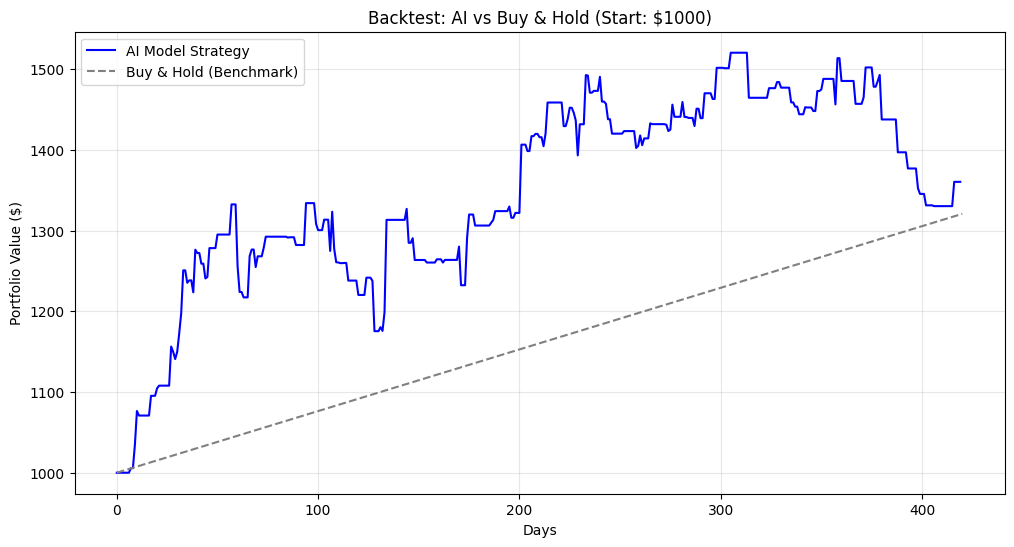

--- Final Results ---
Initial Investment: $1000
Buy & Hold Final:   $1320.88
AI Model Final:     $1360.55


In [11]:
from includes.helpers import backtest_strategy

test_slice_start = len(btc_data) - len(X_test)
df_test_slice = btc_data.iloc[test_slice_start:]
backtest_strategy(xgb_model, X_test, df_test_slice, threshold=xgb_optimal_thresh)

# Random Forest fot BTC prediction

--- 1. Initializing Random Forest Strategy ---

--- 2. Starting Training (One-Shot) ---

--- Computed Class Weights ---
Class 0: 1.0215
Class 1: 0.9794

--- Starting Training ---
Training Random Forest (this may be fast)...

--- Final Evaluation ---
Final Test Accuracy: 49.41%

--- 3. Evaluating Performance ---


<Figure size 800x600 with 0 Axes>

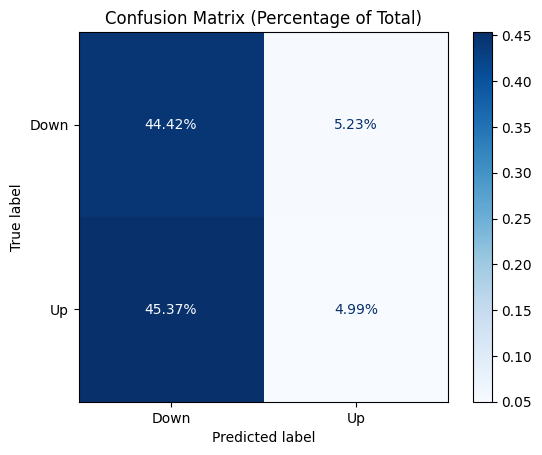


--- Detailed Report (Total Days: 421) ---
True Positives  (Up    -> Up)   : 21 (4.99%)
True Negatives  (Down  -> Down) : 187 (44.42%)
False Positives (Down  -> Up)   : 22 (5.23%)  <-- Trap
False Negatives (Up    -> Down) : 191 (45.37%)  <-- Missed Opp
--- Prediction Statistics ---
Max Prob: 0.5891
Min Prob: 0.2479
Mean Prob: 0.4431


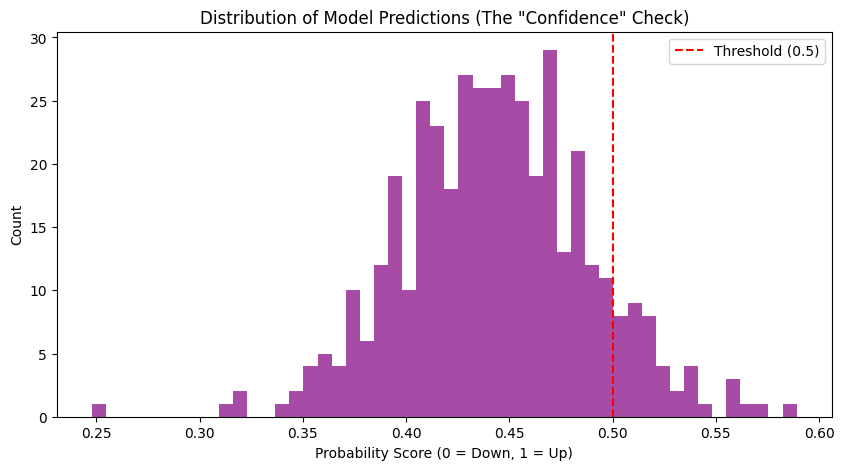


--- 4. Optimizing Threshold ---


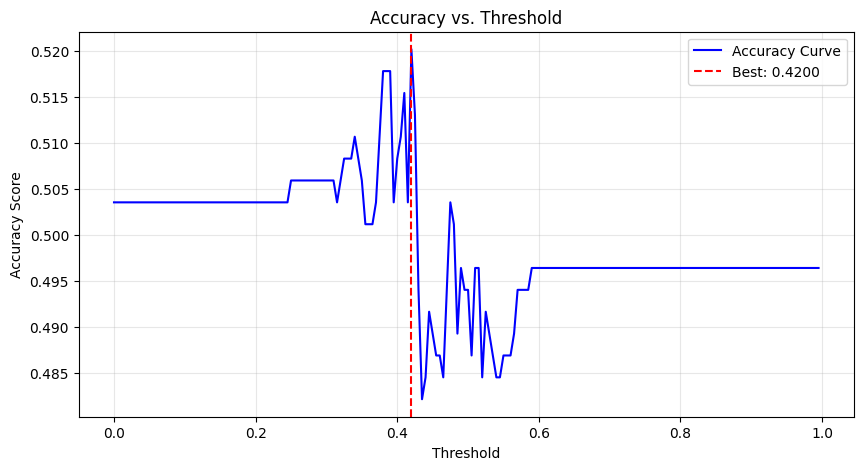

--- Optimization Results ---
Best Threshold: 0.4200
Max Accuracy:   52.02%

--- 5. Saving System (Threshold: 0.4200) ---
Saving artifacts to 'saved_artifacts/' with prefix 'btc_rf'...
Random Forest model saved to saved_artifacts/btc_rf_model.pkl
   -> Model saved to saved_artifacts/btc_rf_model.keras (or .json)
   -> Scaler saved to saved_artifacts/btc_rf_scaler.pkl
   -> Config saved to saved_artifacts/btc_rf_config.json
✅ All artifacts saved successfully!


In [12]:
from sklearn.metrics import accuracy_score, log_loss
from includes.ml_models import build_rf_model
from includes.ml_models import train_model, find_optimal_threshold
from includes.helpers import (plot_training_loss, 
                              plot_confusion_matrix_percent, 
                              diagnose_model_output, 
                              save_artifacts)

# --- Execution Block ---
if __name__ == "__main__":
    print("--- 1. Initializing Random Forest Strategy ---")
    
    # 1. Prepare Input Shape
    # Shape: (Samples, TimeSteps, Features) -> e.g., (1000, 14, 8)
    # The RF Adapter will flatten this internally to (1000, 112)
    input_shape = (X_train.shape[1], X_train.shape[2])
    
    # 2. Build the Model
    # We use the 'Adapter' so it works with our existing training pipeline
    my_model = build_rf_model(input_shape)
    
    # 3. Train the Model
    # NOTE: 'epochs' and 'batch_size' are placeholders here.
    # Random Forest trains in one shot (no epochs), but we pass the values
    # to keep the function signature compatible with the LSTM code.
    print("\n--- 2. Starting Training (One-Shot) ---")
    rf_history, rf_model = train_model(
        my_model, 
        X_train, y_train, 
        X_test, y_test, 
        epochs=50,        # Placeholder (RF doesn't iterate)
        batch_size=32,   # Placeholder (RF uses all data)
        use_class_weights=True # Critical for imbalanced market data
    )

    # 4. Diagnostics & Visualization
    print("\n--- 3. Evaluating Performance ---")
    

    # B. Confusion Matrix (Did we catch the 'Up' moves?)
    plot_confusion_matrix_percent(rf_model, X_test, y_test)

    # C. Confidence Check (Are predictions bunched in the middle?)
    diagnose_model_output(rf_model, X_test)

    # 5. Optimization
    # We find the exact probability threshold (e.g., 0.52) that maximizes accuracy
    print("\n--- 4. Optimizing Threshold ---")
    rf_optimal_thresh = find_optimal_threshold(rf_model, X_test, y_test)

    # 6. Save Artifacts
    # This automatically saves the model as a .pkl file because it detects it's Sklearn
    print(f"\n--- 5. Saving System (Threshold: {rf_optimal_thresh:.4f}) ---")
    save_artifacts(rf_model, scaler, rf_optimal_thresh, "btc_rf")



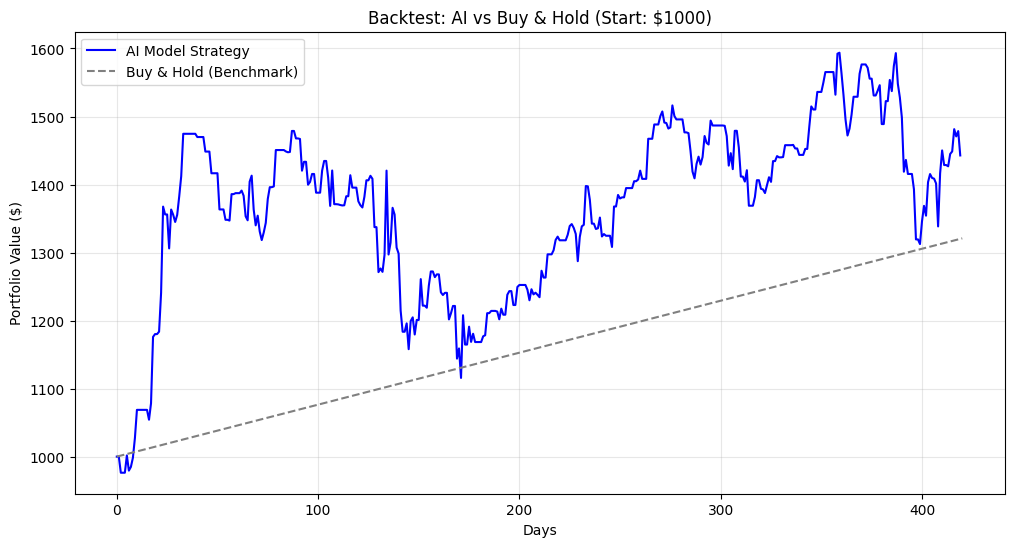

--- Final Results ---
Initial Investment: $1000
Buy & Hold Final:   $1320.88
AI Model Final:     $1442.77


In [13]:
from includes.helpers import backtest_strategy

test_slice_start = len(btc_data) - len(X_test)
df_test_slice = btc_data.iloc[test_slice_start:]
backtest_strategy(rf_model, X_test, df_test_slice, threshold=rf_optimal_thresh)

--- 1. Initializing SVM Strategy ---

--- 2. Starting Training ---
--- Computed Class Weights ---
{0: np.float64(1.0214541120381406), 1: np.float64(0.9794285714285714)}
Training SVM (this solves a global optimization problem)...

Final Test Accuracy: 49.17%

--- 3. Evaluating Performance ---


<Figure size 800x600 with 0 Axes>

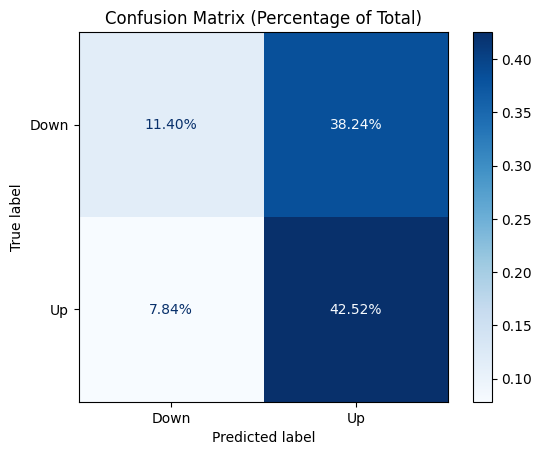


--- Detailed Report (Total Days: 421) ---
True Positives  (Up    -> Up)   : 179 (42.52%)
True Negatives  (Down  -> Down) : 48 (11.40%)
False Positives (Down  -> Up)   : 161 (38.24%)  <-- Trap
False Negatives (Up    -> Down) : 33 (7.84%)  <-- Missed Opp
--- Prediction Statistics ---
Max Prob: 0.5854
Min Prob: 0.5000
Mean Prob: 0.5235


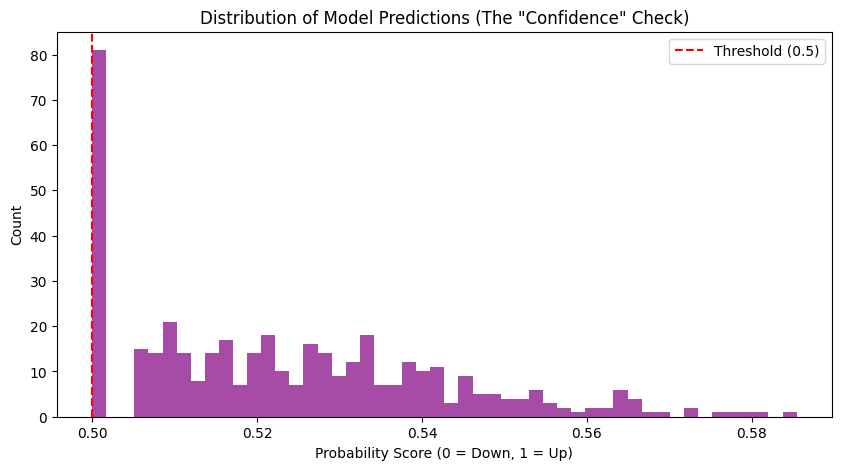


--- 4. Optimizing Threshold ---


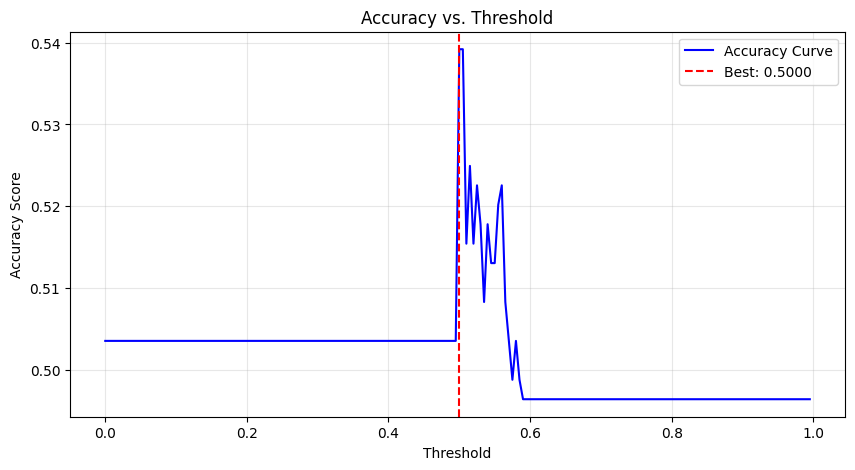

--- Optimization Results ---
Best Threshold: 0.5000
Max Accuracy:   53.92%

--- 5. Saving System (Threshold: 0.5000) ---
Saving artifacts to 'saved_artifacts/' with prefix 'btc_svm'...
   -> Model saved to saved_artifacts/btc_svm_model.keras (or .json)
   -> Scaler saved to saved_artifacts/btc_svm_scaler.pkl
   -> Config saved to saved_artifacts/btc_svm_config.json
✅ All artifacts saved successfully!


In [14]:
# --- Imports ---
import numpy as np
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, log_loss
from includes.ml_models import build_svm_model
from includes.ml_models import find_optimal_threshold
from includes.helpers import (plot_confusion_matrix_percent, 
                              diagnose_model_output, 
                              save_artifacts)

# --- 1. REDEFINE TRAIN_MODEL (Safety Copy) ---
def train_model(model, X_train, y_train, X_test, y_test, epochs=50, batch_size=32, use_class_weights=True):
    from sklearn.utils import class_weight 
    weights_dict = None
    if use_class_weights:
        cw = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
        weights_dict = {i: cw[i] for i in range(len(cw))}
        print(f"--- Computed Class Weights ---\n{weights_dict}")

    if hasattr(model, 'compile'): 
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                            class_weight=weights_dict, validation_data=(X_test, y_test), verbose=1)
    else: 
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                            class_weight=weights_dict, validation_data=(X_test, y_test), verbose=1)
    
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"\nFinal Test Accuracy: {accuracy*100:.2f}%")
    return history, model


# --- 2. EXECUTE SVM TRAINING ---
if __name__ == "__main__":
    print("--- 1. Initializing SVM Strategy ---")
    
    # 1. Prepare Input
    input_shape = (X_train.shape[1], X_train.shape[2])
    
    # 2. Build Model
    my_model = build_svm_model(input_shape)
    
    # 3. Train
    # Note: SVM training time grows with data size. For <5000 rows it is fast.
    print("\n--- 2. Starting Training ---")
    svm_history, svm_model = train_model(
            my_model, 
            X_train, y_train, 
            X_test, y_test, 
            epochs=1,       # Placeholder (Ignored)
            batch_size=32,  # Placeholder (Ignored)
            use_class_weights=True 
        )
    
    # 4. Diagnostics
    print("\n--- 3. Evaluating Performance ---")
    plot_confusion_matrix_percent(svm_model, X_test, y_test)
    diagnose_model_output(svm_model, X_test)

    # 5. Optimize & Save
    print("\n--- 4. Optimizing Threshold ---")
    svm_optimal_thresh = find_optimal_threshold(svm_model, X_test, y_test)

    print(f"\n--- 5. Saving System (Threshold: {svm_optimal_thresh:.4f}) ---")
    # Prefix: 'btc_svm'
    save_artifacts(svm_model, scaler, svm_optimal_thresh, "btc_svm")

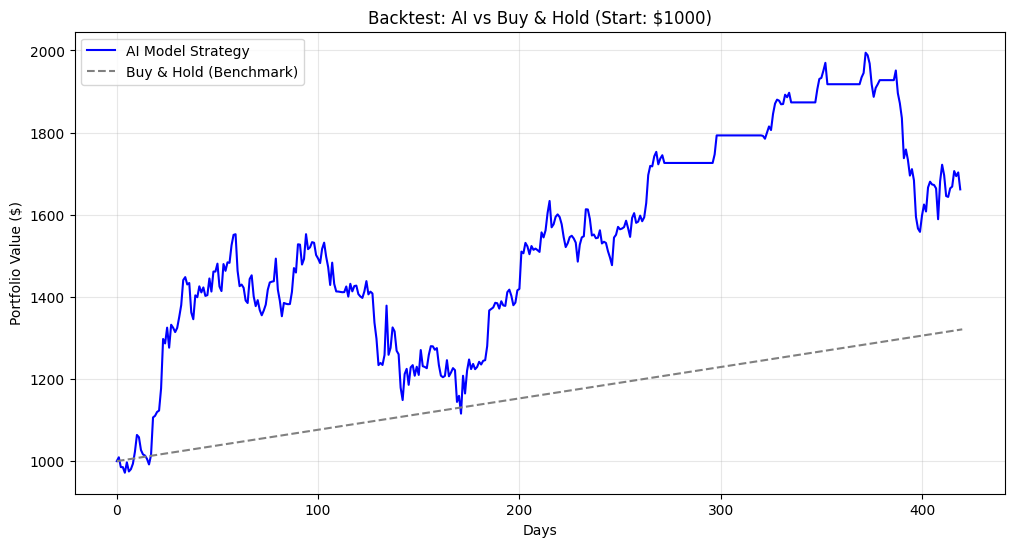

--- Final Results ---
Initial Investment: $1000
Buy & Hold Final:   $1320.88
AI Model Final:     $1661.79


In [15]:
from includes.helpers import backtest_strategy

test_slice_start = len(btc_data) - len(X_test)
df_test_slice = btc_data.iloc[test_slice_start:]
backtest_strategy(svm_model, X_test, df_test_slice, threshold=svm_optimal_thresh)

# K nearest neighbors for BTC prediction

--- 1. Initializing KNN (Pattern Matching) Strategy ---

--- 2. Starting Training ---

--- Class Weights: Disabled (1.0 for all) ---

--- Starting Training ---
Training KNN (Indexing 1714 patterns)...

--- Final Evaluation ---
Final Test Accuracy: 51.31%

--- 3. Evaluating Performance ---


<Figure size 800x600 with 0 Axes>

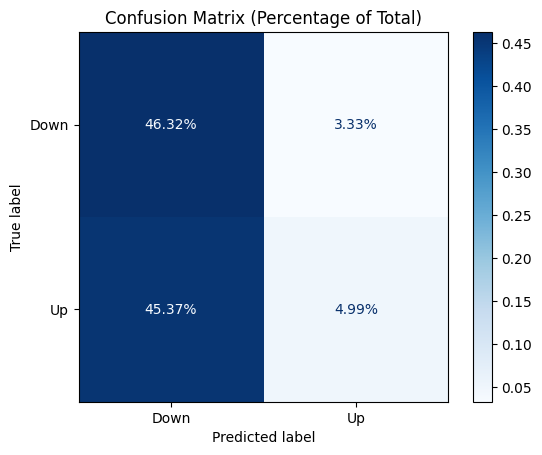


--- Detailed Report (Total Days: 421) ---
True Positives  (Up    -> Up)   : 21 (4.99%)
True Negatives  (Down  -> Down) : 195 (46.32%)
False Positives (Down  -> Up)   : 14 (3.33%)  <-- Trap
False Negatives (Up    -> Down) : 191 (45.37%)  <-- Missed Opp
--- Prediction Statistics ---
Max Prob: 0.5556
Min Prob: 0.2984
Mean Prob: 0.4530


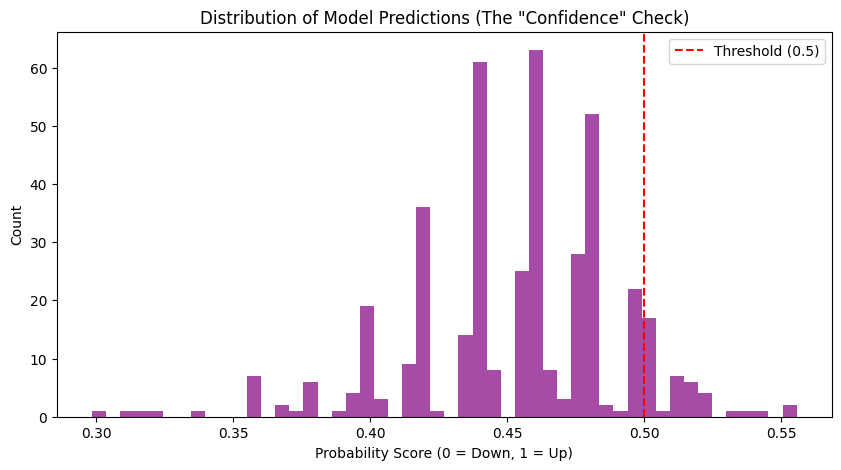


--- 4. Optimizing Threshold ---


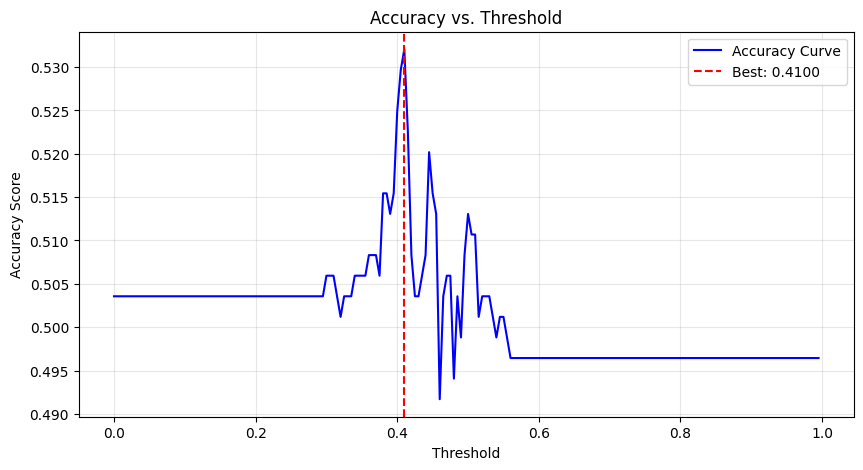

--- Optimization Results ---
Best Threshold: 0.4100
Max Accuracy:   53.21%

--- 5. Saving System (Threshold: 0.4100) ---
Saving artifacts to 'saved_artifacts/' with prefix 'btc_knn'...
KNN model saved to saved_artifacts/btc_knn_model.pkl
   -> Model saved to saved_artifacts/btc_knn_model.keras (or .json)
   -> Scaler saved to saved_artifacts/btc_knn_scaler.pkl
   -> Config saved to saved_artifacts/btc_knn_config.json
✅ All artifacts saved successfully!


In [16]:
import numpy as np
from includes.ml_models import *
from includes.ml_models import train_model, find_optimal_threshold
from includes.helpers import (plot_confusion_matrix_percent, 
                              diagnose_model_output, 
                              save_artifacts)

# --- EXECUTE KNN TRAINING ---
if __name__ == "__main__":
    print("--- 1. Initializing KNN (Pattern Matching) Strategy ---")
    
    # 1. Prepare Input
    input_shape = (X_train.shape[1], X_train.shape[2])
    
    # 2. Build Model
    my_model = build_knn_model(input_shape)
    
    # 3. Train
    print("\n--- 2. Starting Training ---")
    # Note: KNN 'training' is just indexing the data. It is instant.
    knn_history, knn_model = train_model(
        my_model, 
        X_train, y_train, 
        X_test, y_test, 
        epochs=1,       # Ignored
        batch_size=32,  # Ignored
        use_class_weights=False # Handled internally by 'weights=distance'
    )

    # 4. Diagnostics
    print("\n--- 3. Evaluating Performance ---")
    
    # Plot Confusion Matrix
    plot_confusion_matrix_percent(knn_model, X_test, y_test)

    # Check Confidence
    diagnose_model_output(knn_model, X_test)

    # 5. Optimize & Save
    print("\n--- 4. Optimizing Threshold ---")
    knn_optimal_thresh = find_optimal_threshold(knn_model, X_test, y_test)

    print(f"\n--- 5. Saving System (Threshold: {knn_optimal_thresh:.4f}) ---")
    save_artifacts(knn_model, scaler, knn_optimal_thresh, "btc_knn")

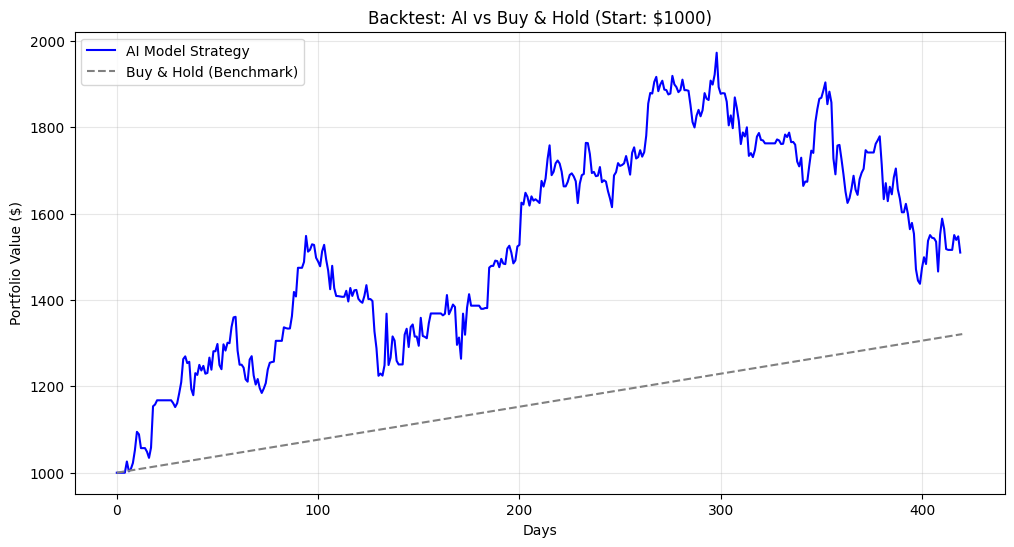

--- Final Results ---
Initial Investment: $1000
Buy & Hold Final:   $1320.88
AI Model Final:     $1509.61


In [17]:
from includes.helpers import backtest_strategy

test_slice_start = len(btc_data) - len(X_test)
knn_test_slice = btc_data.iloc[test_slice_start:]
backtest_strategy(knn_model, X_test, knn_test_slice, threshold=knn_optimal_thresh)

--- 🚀 STARTING INDIVIDUAL MODEL BACKTEST ---
Finished XGBoost: Final Value $1360.55
Finished RandomForest: Final Value $1442.77
Finished SVM: Final Value $1662.31
Finished KNN: Final Value $1509.61


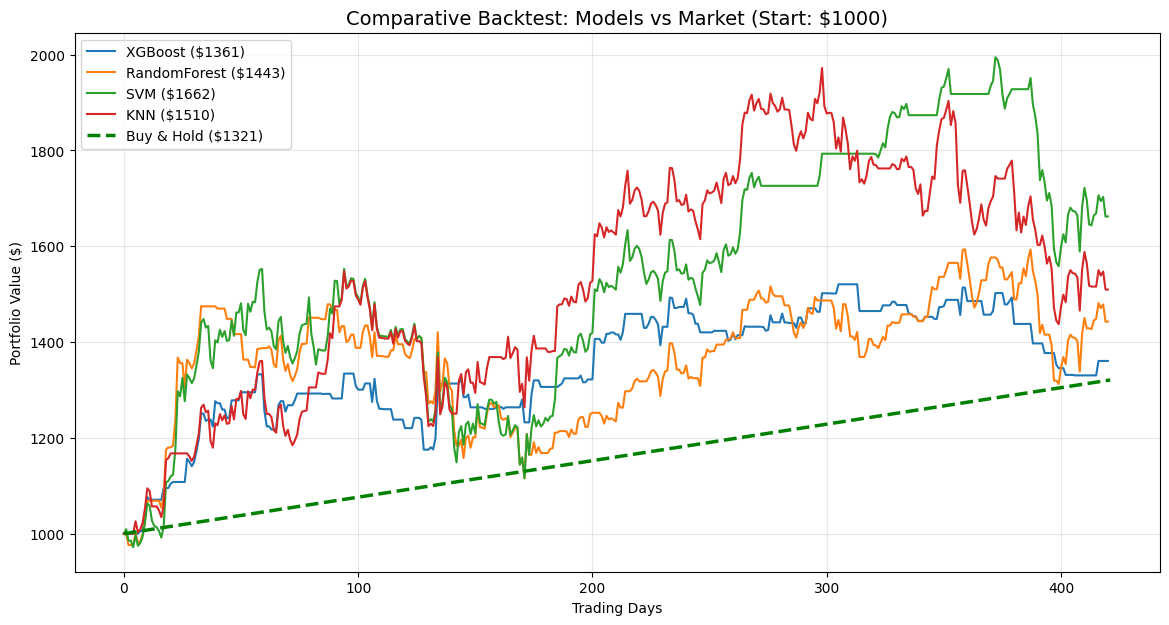


STRATEGY        | FINAL VALUE  | RETURN  
----------------------------------------
SVM             | $1,662.31   | +66.23%
KNN             | $1,509.61   | +50.96%
RandomForest    | $1,442.77   | +44.28%
XGBoost         | $1,360.55   | +36.05%
----------------------------------------
Buy & Hold      | $1,320.88   | +32.09%


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def backtest_models_individually(models_config, X_test, df_test, initial_capital=1000):
    """
    Backtests multiple models individually and compares them against Buy & Hold.
    NO ENSEMBLE logic included.
    
    Args:
        models_config (list of dicts): 
            [
              {'model': xgb_model,  'threshold': 0.48, 'name': 'XGBoost'},
              ...
            ]
        X_test (np.array): The 3D feature set used for prediction.
        df_test (pd.DataFrame): The original Dataframe matching X_test (must have 'Close').
        initial_capital (float): Starting cash.
    """
    print(f"--- 🚀 STARTING INDIVIDUAL MODEL BACKTEST ---")
    
    # 1. Align Prices
    prices = df_test['Close'].values
    
    # Safety check for length mismatch
    if len(prices) != len(X_test):
        print(f"⚠️ Warning: Length mismatch. Prices: {len(prices)}, X_test: {len(X_test)}")
        min_len = min(len(prices), len(X_test))
        prices = prices[:min_len]
        X_test = X_test[:min_len]

    equity_curves = {}
    
    plt.figure(figsize=(14, 7))
    
    # --- 2. LOOP THROUGH EACH MODEL ---
    for config in models_config:
        model = config['model']
        thresh = config['threshold']
        name = config['name']
        
        # A. Get Probabilities (Handle Keras vs Sklearn Adapters)
        if hasattr(model, 'predict_proba'):
            # Adapters (XGB, RF, SVM, KNN) -> predict_proba -> [class_0, class_1]
            probs = model.predict_proba(X_test)[:, 1]
        else:
            # Keras (LSTM) -> predict -> [prob]
            probs = model.predict(X_test, verbose=0).flatten()
            
        # B. Calculate Individual Equity Curve
        signals = (probs > thresh).astype(int)
        curve = _run_simulation(signals, prices, initial_capital)
        equity_curves[name] = curve
        
        # Plot Individual Model (Solid lines for better visibility)
        plt.plot(curve, label=f"{name} (${curve[-1]:.0f})", linewidth=1.5)
        print(f"Finished {name}: Final Value ${curve[-1]:.2f}")

    # --- 3. BENCHMARK (BUY & HOLD) ---
    btc_return = (prices[-1] - prices[0]) / prices[0]
    buy_hold_final = initial_capital * (1 + btc_return)
    
    # Create a straight line for Buy & Hold visual
    plt.plot([0, len(prices)], [initial_capital, buy_hold_final], 
             label=f"Buy & Hold (${buy_hold_final:.0f})", color='green', linestyle='--', linewidth=2.5)

    # --- 4. FINALIZE PLOT ---
    plt.title(f'Comparative Backtest: Models vs Market (Start: ${initial_capital})', fontsize=14)
    plt.ylabel('Portfolio Value ($)')
    plt.xlabel('Trading Days')
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Print Summary Table
    print(f"\n{'STRATEGY':<15} | {'FINAL VALUE':<12} | {'RETURN':<8}")
    print("-" * 40)
    
    sorted_results = sorted(equity_curves.items(), key=lambda x: x[1][-1], reverse=True)
    
    for name, curve in sorted_results:
        final_val = curve[-1]
        ret = ((final_val - initial_capital) / initial_capital) * 100
        print(f"{name:<15} | ${final_val:,.2f}   | {ret:+.2f}%")
        
    print("-" * 40)
    print(f"{'Buy & Hold':<15} | ${buy_hold_final:,.2f}   | {btc_return*100:+.2f}%")


def _run_simulation(signals, prices, initial_capital):
    """Helper to run the cash/position loop."""
    cash = initial_capital
    position = 0
    curve = []
    
    for i in range(len(signals) - 1):
        price_today = prices[i]
        
        if signals[i] == 1 and position == 0:
            # BUY
            position = cash / price_today
            cash = 0
        elif signals[i] == 0 and position > 0:
            # SELL
            cash = position * price_today
            position = 0
            
        # Daily Mark-to-Market
        val = cash + (position * price_today)
        curve.append(val)
        
    # Append final day
    val = cash + (position * prices[-1])
    curve.append(val)
    return curve

# ==========================================
# EXECUTION EXAMPLE
# ==========================================
if __name__ == "__main__":
    # 1. Define your lineup
    models_to_test = [
        # {'model': lstm_model, 'threshold': optimal_thresh,      'name': 'LSTM'}, # Uncomment if LSTM is in memory
        {'model': xgb_model,   'threshold': xgb_optimal_thresh, 'name': 'XGBoost'},
        {'model': rf_model,    'threshold': rf_optimal_thresh,  'name': 'RandomForest'},
        {'model': svm_model,   'threshold': svm_optimal_thresh, 'name': 'SVM'},
        {'model': knn_model,   'threshold': knn_optimal_thresh, 'name': 'KNN'}
    ]
    
    # 2. Prepare the Test Slice
    test_slice_start = len(btc_data) - len(X_test)
    df_test_slice = btc_data.iloc[test_slice_start:]
    
    # 3. Run
    backtest_models_individually(models_to_test, X_test, df_test_slice)

--- 🎲 STARTING ROLLING BACKTEST (100 Random Windows) ---

📅 Random Start Dates Selected:
   ['2025-02-18', '2025-04-22', '2025-08-20', '2025-01-20', '2025-07-01'] ... and 95 more.


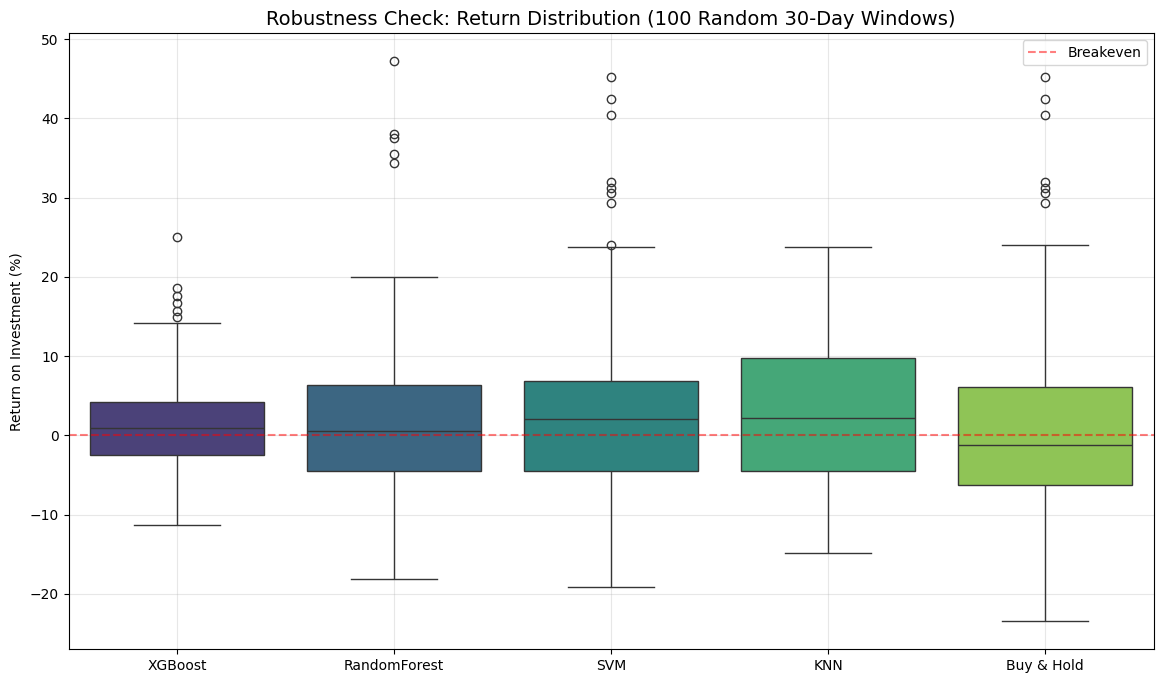


STRATEGY        | WIN RATE   | MEDIAN ROI   | RISK (StdDev)  
------------------------------------------------------------
XGBoost         |  59.0%     |   0.88%      |   6.28
RandomForest    |  54.0%     |   0.60%      |  10.53
SVM             |  57.0%     |   2.02%      |  12.68
KNN             |  55.0%     |   2.18%      |   9.27
------------------------------------------------------------
Buy & Hold      | N/A        |  -1.25%      |  13.49


In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 

def rolling_window_backtest(models_config, X_test, df_test, 
                            window_days=60, n_starts=20, initial_capital=1000):
    """
    Runs N separate backtests starting from random days.
    """
    print(f"--- 🎲 STARTING ROLLING BACKTEST ({n_starts} Random Windows) ---")
    
    # 1. Align Prices & Dates
    prices = df_test['Close'].values
    dates = df_test.index
    
    if len(prices) != len(X_test):
        min_len = min(len(prices), len(X_test))
        prices = prices[:min_len]
        X_test = X_test[:min_len]
        dates = dates[:min_len]

    # 2. Pre-calculate Signals (Speed Optimization)
    model_signals = {}
    for config in models_config:
        model = config['model']
        thresh = config['threshold']
        
        if hasattr(model, 'predict_proba'):
            probs = model.predict_proba(X_test)[:, 1]
        else:
            probs = model.predict(X_test, verbose=0).flatten()
            
        model_signals[config['name']] = (probs > thresh).astype(int)

    # 3. Select Random Start Dates
    # We remove the fixed seed so it is different every time you run it
    # np.random.seed(42) <--- COMMENTED OUT FOR TRUE RANDOMNESS
    
    max_start_index = len(prices) - window_days
    if max_start_index < 1:
        raise ValueError("Not enough test data for this window size!")

    # Pick N random indices
    start_indices = np.random.choice(range(max_start_index), n_starts, replace=False)
    
    # Print the dates so you can see them
    print("\n📅 Random Start Dates Selected:")
    selected_dates = [dates[i].strftime('%Y-%m-%d') for i in start_indices[:5]]
    print(f"   {selected_dates} ... and {n_starts - 5} more.")

    # 4. Run Simulations
    results_data = {config['name']: [] for config in models_config}
    results_data['Buy & Hold'] = []

    for start_idx in start_indices:
        end_idx = start_idx + window_days
        
        # Slicing for this specific window
        window_prices = prices[start_idx : end_idx]
        
        # Benchmark Return
        bh_return = ((window_prices[-1] - window_prices[0]) / window_prices[0]) * 100
        results_data['Buy & Hold'].append(bh_return)
        
        # Model Returns
        for config in models_config:
            name = config['name']
            window_signals = model_signals[name][start_idx : end_idx]
            
            final_val = _run_simulation_fast(window_signals, window_prices, initial_capital)
            roi = ((final_val - initial_capital) / initial_capital) * 100
            results_data[name].append(roi)

    # 5. Visualization (Box Plot)
    plt.figure(figsize=(14, 8))
    plot_df = pd.DataFrame(results_data)
    
    sns.boxplot(data=plot_df, palette="viridis")
    plt.axhline(0, color='red', linestyle='--', alpha=0.5, label="Breakeven")
    
    plt.title(f'Robustness Check: Return Distribution ({n_starts} Random {window_days}-Day Windows)', fontsize=14)
    plt.ylabel('Return on Investment (%)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()
    
    # 6. Summary Statistics
    print(f"\n{'STRATEGY':<15} | {'WIN RATE':<10} | {'MEDIAN ROI':<12} | {'RISK (StdDev)':<15}")
    print("-" * 60)
    
    bh_returns = np.array(results_data['Buy & Hold'])
    
    for name in models_config:
        name_str = name['name']
        model_returns = np.array(results_data[name_str])
        
        # Win Rate: How often did we beat Buy & Hold?
        wins = np.sum(model_returns > bh_returns)
        win_rate = (wins / n_starts) * 100
        
        median_roi = np.median(model_returns)
        std_dev = np.std(model_returns)
        
        print(f"{name_str:<15} | {win_rate:5.1f}%     | {median_roi:6.2f}%      | {std_dev:6.2f}")
    
    print("-" * 60)
    print(f"{'Buy & Hold':<15} | {'N/A':<10} | {np.median(bh_returns):6.2f}%      | {np.std(bh_returns):6.2f}")


def _run_simulation_fast(signals, prices, initial_capital):
    cash = initial_capital
    position = 0
    for i in range(len(signals) - 1):
        if signals[i] == 1 and position == 0:
            position = cash / prices[i]; cash = 0
        elif signals[i] == 0 and position > 0:
            cash = position * prices[i]; position = 0
    return cash + (position * prices[-1])

# ==========================================
# EXECUTION
# ==========================================
if __name__ == "__main__":
    # Define models
    models_to_test = [
        {'model': xgb_model,   'threshold': xgb_optimal_thresh, 'name': 'XGBoost'},
        {'model': rf_model,    'threshold': rf_optimal_thresh,  'name': 'RandomForest'},
        {'model': svm_model,   'threshold': svm_optimal_thresh, 'name': 'SVM'},
        {'model': knn_model,   'threshold': knn_optimal_thresh, 'name': 'KNN'}
    ]
    
    # Prepare Slice
    test_slice_start = len(btc_data) - len(X_test)
    df_test_slice = btc_data.iloc[test_slice_start:]
    
    # Run Test: 50 random starts, 90-day duration each
    rolling_window_backtest(models_to_test, X_test, df_test_slice, 
                            window_days=30, n_starts=100)